# Encoding
- Variables categóricas

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_asunciones as sa
from src import soporte_preprocesamiento as sp
from src import soporte_encoding as se

- Importamos el dataframe generado en el notebook anterior.

In [3]:
df = pd.read_csv("../../datos/modelo2/csv_sin_nulos.csv", index_col=0)

In [4]:
df.dtypes

price           float64
propertyType     object
size            float64
exterior           bool
rooms             int64
bathrooms         int64
municipality     object
distance          int64
floor            object
hasLift          object
dtype: object

In [5]:
df[["rooms", "bathrooms", "exterior"]] = df[["rooms", "bathrooms", "exterior"]].astype(str)

- En total, tenemos 7 variables respuesta categóricas, dado que, entendemos que la cantidad de baños y habitaciones son una características con un número limitado de valores únicos (menos de 3 baños y 6 habitaciones), lo que quiere decir son discretas, siendo más una etiqueta que un valor matemático continuo y cambiante. 

In [5]:
lista_col_categ = df.select_dtypes(include="O").columns.tolist()
lista_col_categ

['propertyType',
 'exterior',
 'rooms',
 'bathrooms',
 'municipality',
 'floor',
 'hasLift']

Con un barplot, somos capaces de visualizar la relación entre la variable respuesta (price) y el resto de las variables categóricas.

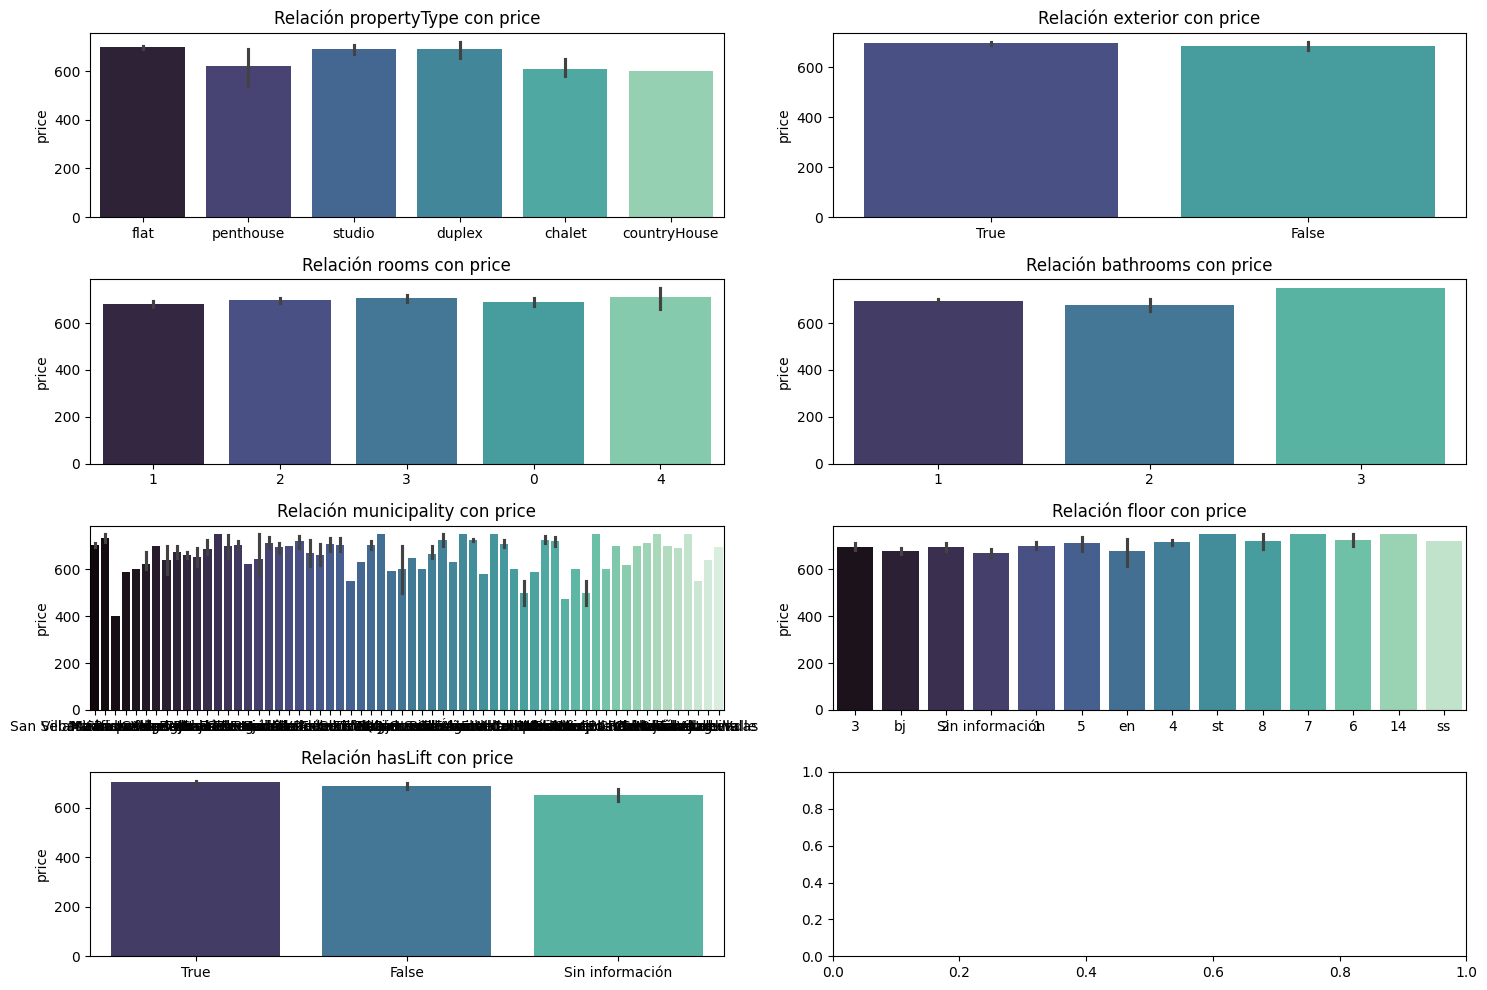

In [ ]:
sa.visualizar_categorias(df, lista_col_categ, "price", tipo_grafica="barplot")

### Diferencias entre categorías y orden
- El siguiente paso será comprobar la normalidad y homocedasticidad, con el fin de identificar si son o no paramétricas, y comprobar diferencias.

- Para evaluar si hay diferencias entre las categorías de nuestras variables predictoras categóricas y dónde se encuentran, utilizaremos los tests de Mann-Whitney (VR con 2 categorías) y Kruskal (VR con más de categorías).

In [ ]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = sa.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")

for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    # comprobamos la normalidad
    asunciones.identificar_normalidad(metodo = "k") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n-------------\n")


-------------

Estamos analizando la variable PROPERTYTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable propertyType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['flat', 'penthouse', 'studio', 'duplex', 'chalet', 'countryHouse']



Realizando test de K...
Estadístico de prueba: 10.506405484858067
Valor p: 0.06209401960641757
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
12,-77.6543,0.0009,-132.7417,-22.5670,flat-penthouse
14,69.7250,0.0111,10.2387,129.2113,penthouse-studio



-------------

Estamos analizando la variable EXTERIOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable exterior las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False']

Realizando test de M...
Estadístico del Test de Mann-Whitney U: 10661.5
Valor p: 0.17865823200176378
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



-------------

Estamos analizando la variable ROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable rooms las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3', '0', '4']

Realizando test de K...
Estadístico de prueba: 6.8815878486723046
Valor p: 0.14227965565611975
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



-------------

Estamos analizando la variable BATHROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable bathrooms las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3']

Realizando test de K...
Estadístico de prueba: 2.17997725670301
Valor p: 0.3362203170642569
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



-------------

Estamos analizando la variable MUNICIPALITY
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable municipality las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Madrid', 'San Sebastián de los Reyes', 'Villamanrique de Tajo', 'Rascafría', 'Manzanares el Real', 'Miraflores de la Sierra', 'Galapagar', 'Arganda', 'San Lorenzo de el Escorial', 'Aldea del Fresno', 'Aranjuez', 'Villanueva del Pardillo', 'Las Rozas de Madrid', 'Navalcarnero', 'Alcalá de Henares', 'El Escorial', 'Leganés', 'Coslada', 'Torrejón de Ardoz', 'Camarma de Esteruelas', 'Alcorcón', 'Pinto', 'Valdemoro', 'Collado Villalba', 'Getafe', 'Paracuellos de Jarama', 'El Molar', 'Parla', 'Tres Cantos', 'Quijorna', 'Valdemorillo', 'Pedrezuela', 'Daganzo de Arriba', 'Guadarrama', 'Cobeña', 'El Álamo', 'Algete', 'Rivas-Vaciamadrid', 'Los Santos de la Humosa', 'San Fernando de Henares', 'Fuenlabrada', 'Mataelpino', 'Vill

,meandiff,p-adj,lower,upper,group_diff
35,-230.0909,0.0104,-439.0039,-21.1779,Alcalá de Henares-Navalafuente
45,-205.0909,0.0001,-355.9920,-54.1899,Alcalá de Henares-Robledo de Chavela
56,-205.0909,0.0001,-355.9920,-54.1899,Alcalá de Henares-Villa del Prado
58,-305.0909,0.0000,-514.0039,-96.1779,Alcalá de Henares-Villamanrique de Tajo
118,-295.0000,0.0369,-583.9535,-6.0465,Alcobendas-Villamanrique de Tajo
...,...,...,...,...,...
1865,-250.0000,0.0012,-454.3210,-45.6790,Tres Cantos-Villa del Prado
1867,-350.0000,0.0000,-600.2411,-99.7589,Tres Cantos-Villamanrique de Tajo
1878,-261.0000,0.0020,-479.4283,-42.5717,Valdemoro-Villamanrique de Tajo
1883,188.6667,0.0424,2.1480,375.1853,Villa del Prado-Villanueva del Pardillo



-------------

Estamos analizando la variable FLOOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable floor las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['3', 'bj', '2', 'Sin información', '1', '5', 'en', '4', 'st', '8', '7', '6', '14', 'ss']

Realizando test de K...
Estadístico de prueba: 31.41330297540638
Valor p: 0.0029325003277887503
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
50,-45.4949,0.0335,-89.3276,-1.6623,4-Sin información



-------------

Estamos analizando la variable HASLIFT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable hasLift las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False', 'Sin información']

Realizando test de K...
Estadístico de prueba: 13.741192537868532
Valor p: 0.0010378580375743874
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-37.4113,0.0348,-72.7072,-2.1154,False-Sin información
2,52.0495,0.0016,16.8769,87.2220,Sin información-True



-------------



In [ ]:
visual_encoding = sa.Analisis_Visual_Encoding(df, lista_col_categ, "price")

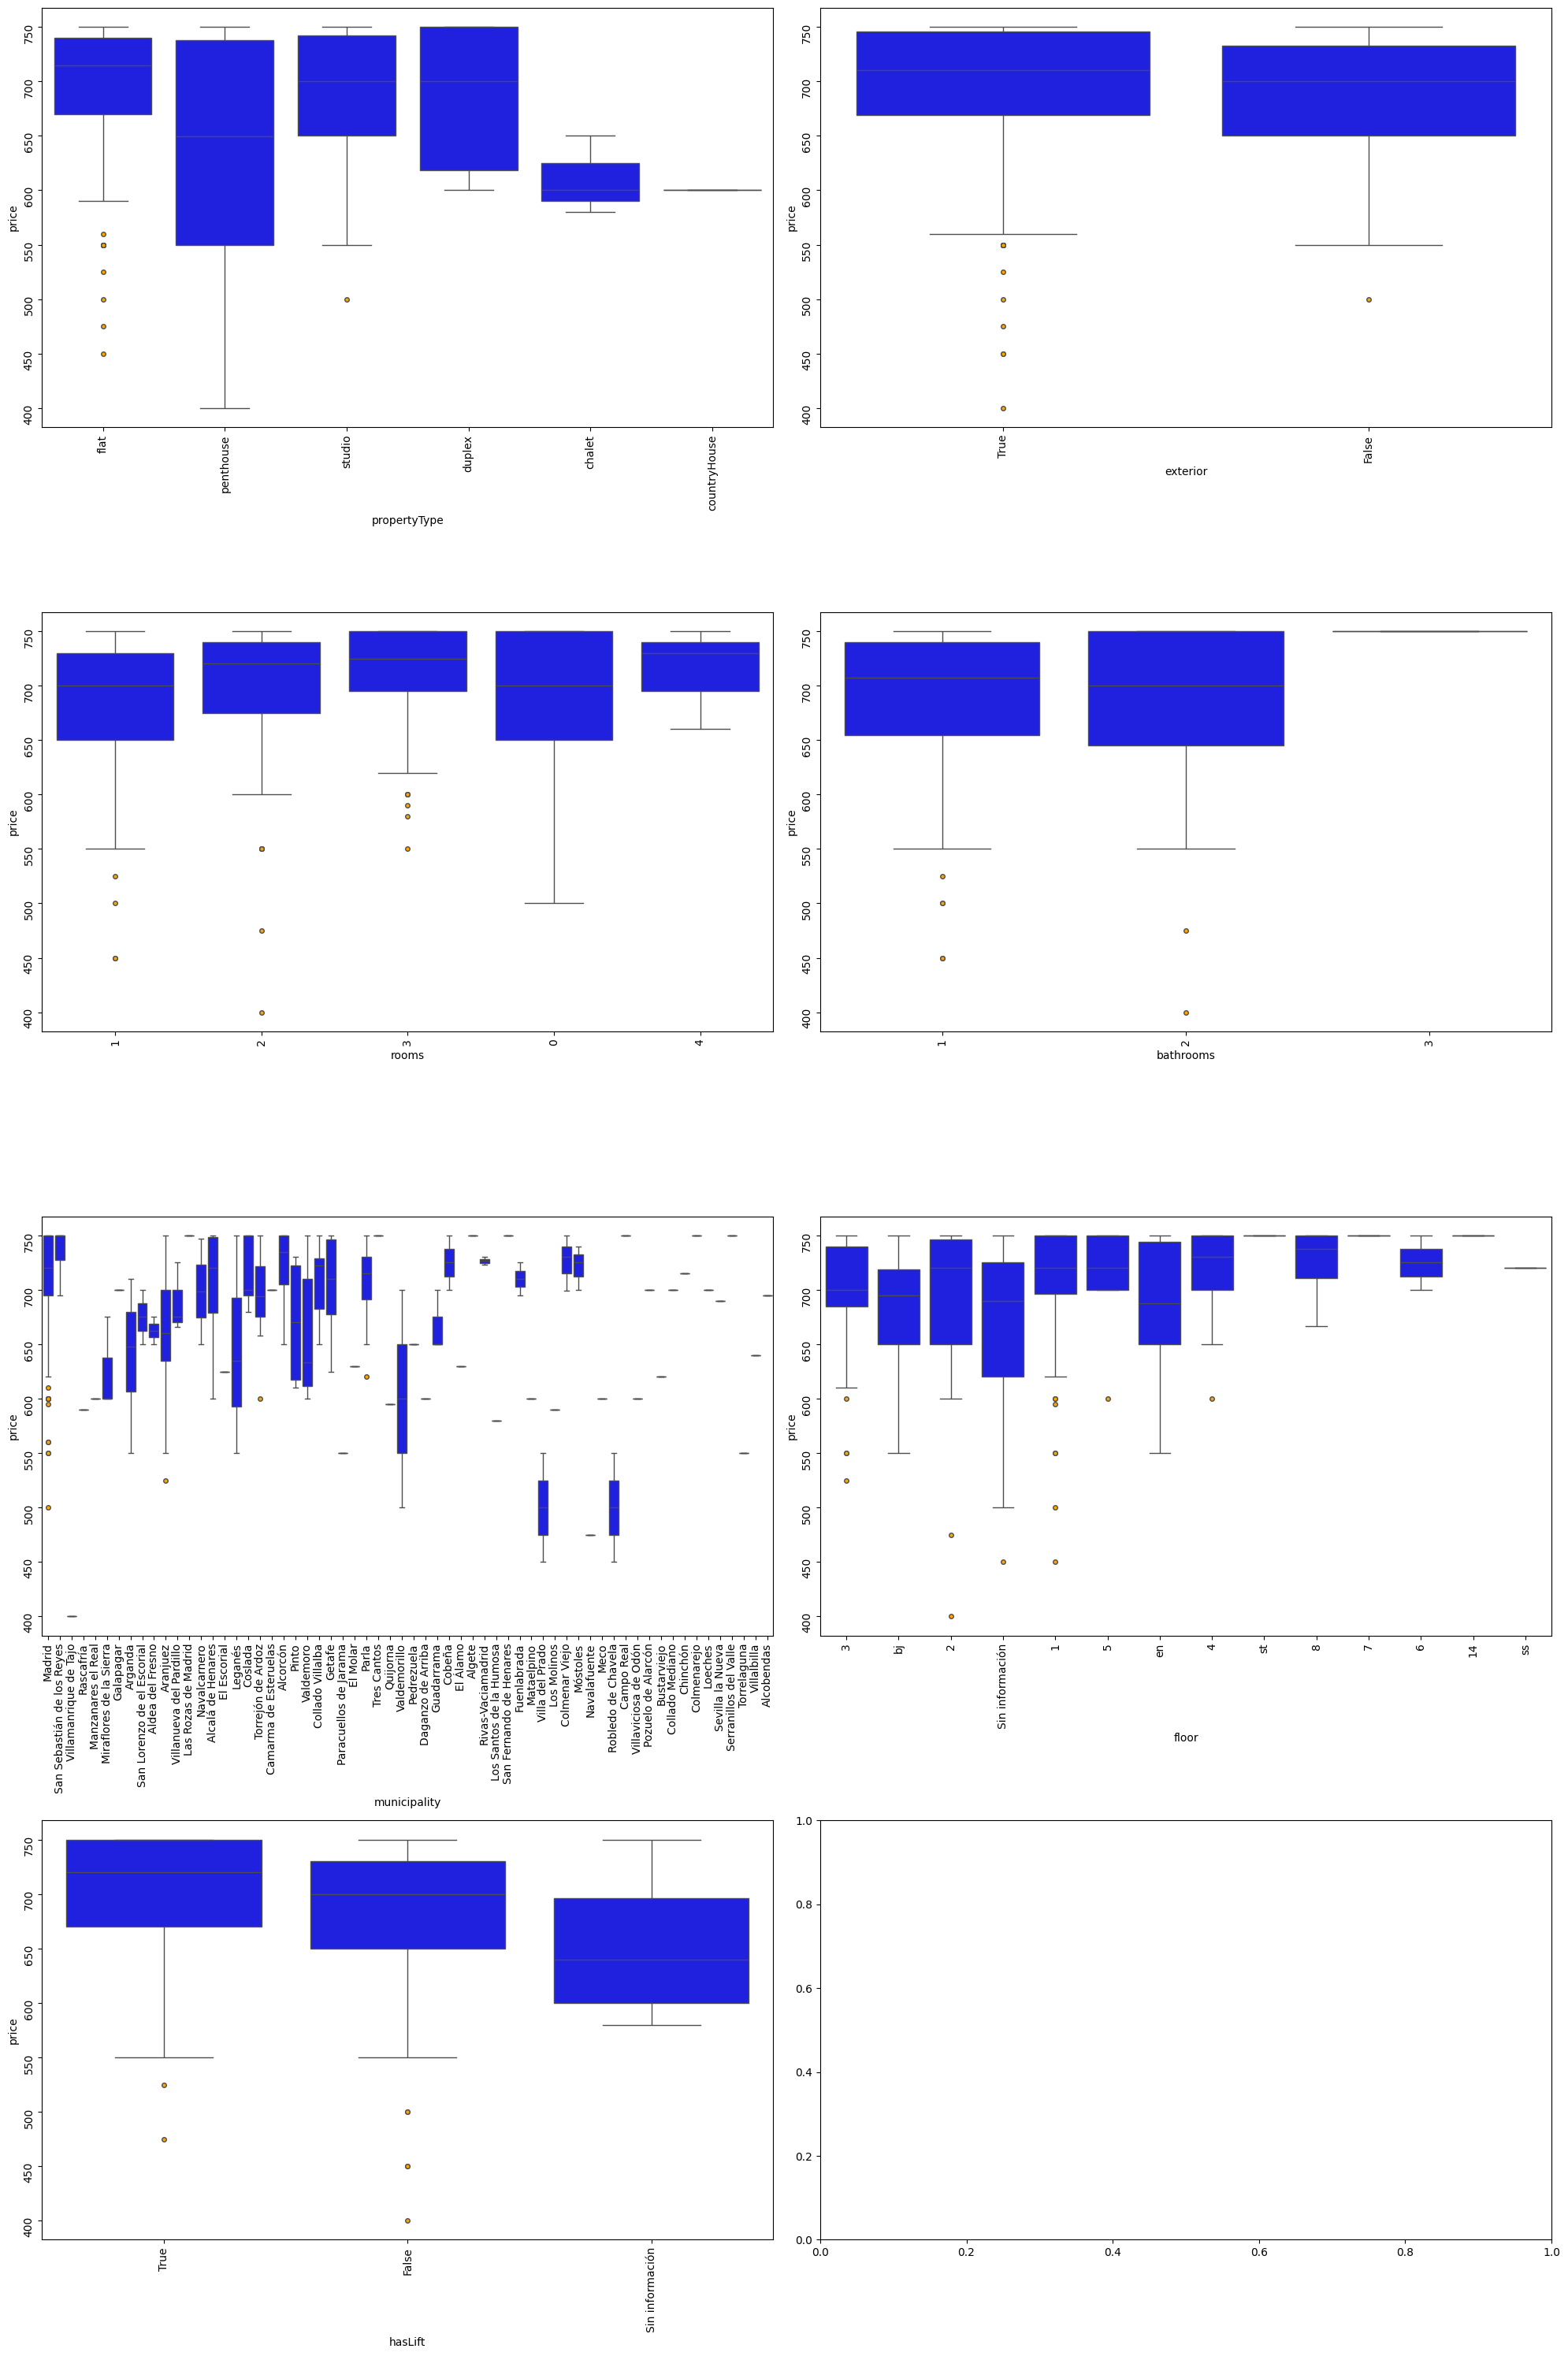

In [ ]:
visual_encoding.crear_boxplot(tamano_grafica=(20, 30))

- Con ayuda de los tests y las visualizaciones, hemos identificado que existen diferencias significativas para las variables municipality, floor y hasLift, por sus p-valores <0,05.

- En el caso de hasLift y exterior, que contienen valores booleanos (True-False) y otra categoría -sin información-, los sustituiremos haciendo un mapeo con -1, 0 y 1, para dar o restar importancia. No hará falta utilizar otro método de encoding.

- Por su parte, para floor, sustituiremos los valores alfabéticos para que representen su importancia, sustituyendo de la siguiente manera:
    - Sin información: -3
    - st: -2
    - ss: -1
    - bj: 0
    - en: 0.5

In [6]:
df["hasLift"].unique()

array(['True', 'False', 'Sin información'], dtype=object)

In [7]:
df['hasLift'] = df['hasLift'].map({
    "True": 1, 
    "False": 0, 
    'Sin información': -1
})

df['exterior'] = df['exterior'].map({
    "True": 1, 
    "False": 0, 
    'Sin información': -1
})

df['floor'] = df['floor'].map({
    'st': -2, 
    'ss': -1,
    'bj': 0,
    'en': 0.5, 
    'Sin información': -3
}).fillna(df['floor']) 

### Tabla resumen de p-valores y métodos de encoding

| Variable Predictora | p-valor | Método Encoding | Motivo
|------------------|--------|------------------------|------------------------|
| `municipality`   |0.00        | Target                 | No tiene orden, pero hay muchos municipios.
| `propertyType`   |0.06        | OneHot                 | No tiene orden, y hay sólo 6 tipos.
| `floor`          |0.00        | No modificamos                | Sigue un orden lógico, sustituimos valores alfabéticos asignando peso numérico.
| `hasLift`        |0.00        | Manual                | Sustituimos booleanos por -1, 0 y 1.
| `rooms`          |0.14        | No modificamos                | Sigue un orden lógico.
| `bathrooms`      |0.33        | No modificamos                  | Sigue un orden lógico.
| `exterior`       |0.18        | Manual                  | Sustituimos booleanos por -1, 0 y 1.

In [8]:
df.columns

Index(['price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms',
       'municipality', 'distance', 'floor', 'hasLift'],
      dtype='object')

In [9]:
diccionario_encoding = {
    "onehot": [],
    "dummies": [],
    "ordinal": {},
    "label": [],
    "frequency": [],
    "target": ['propertyType', 'exterior', 'rooms', 'bathrooms',
       'municipality', 'floor', 'hasLift']
}

In [10]:
encoding = se.Encoding(df, diccionario_encoding, "price")

- Y aplicamos ahora el Target.

In [ ]:
ta_enc = encoding.target_encoding()
ta_enc.head()

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift
0,750.0,697.554348,60.0,1,682.516667,694.538217,705.633136,7037,697.957447,1
1,750.0,697.554348,70.0,1,697.968750,694.538217,735.546086,16145,678.344828,0
2,400.0,619.909010,67.0,1,697.968750,677.594595,546.457386,55041,696.178571,0
3,590.0,697.554348,70.0,1,705.230769,677.594595,641.457386,56596,670.111111,0
4,684.0,689.625000,45.0,1,690.857143,694.538217,705.633136,10656,670.111111,-1


- Guardamos el DF que pasará al paso #3 del preprocesamiento, donde realizaremos la gestión de outliers para las variables numéricas.

In [13]:
ta_enc.to_csv("../../datos/modelo3/csv_encoded.csv")